In [5]:
import os
import numpy as np

single_class_1feature = '/home/950154_customer/sungting/data/from_110/2022-08-17-15-37-55-test-single-stage-intensity-only/npz_output'
single_class_5feature = '/home/950154_customer/sungting/da_centernet_uda/bimo_centernet_5feature_single_stage/outputs/hw2itri_em_dla_test/2022-07-30-16-50-49-test/npz_output'

single_class_1feature_two_stage = '/home/950154_customer/sungting/da_centernet_uda/centernet-uda-ang-two-stage-bimo-intensity-only/outputs/hw2itri_em_dla_test/2022-08-02-15-06-26-test/npz_output'
single_class_5feature_two_stage = '/home/950154_customer/sungting/da_centernet_uda/centernet-uda-ang-two-stage-bimo/outputs/hw2itri_em_dla_itri_test/2022-07-22-11-41-38-test-201007-fix_lt_xy/npz_output'


feature1 = sorted(os.listdir(single_class_1feature))
feature5 = sorted(os.listdir(single_class_5feature))
feature1_two_stage = sorted(os.listdir(single_class_1feature_two_stage))
feature5_two_stage = sorted(os.listdir(single_class_5feature_two_stage))

In [2]:
all_exp_root_dir = {
	0: single_class_1feature,
	1: single_class_5feature,
	2: single_class_1feature_two_stage,
	3: single_class_5feature_two_stage
}

all_exp = {
	0: feature1,
	1: feature5,
	2: feature1_two_stage,
	3: feature5_two_stage
}

all_exp_text = {
	0: 'intensity-only',
	1: 'enrichment',
	2: 'intensity-only two-stage',
	3: 'enrichment two-stage'
}

In [5]:
for exp1 in feature1:
	exp1_arr = np.load(os.path.join(
		all_exp_root_dir[0],
		exp1
	))

	print(exp1_arr.files)

	for i, t in enumerate(exp1_arr.files):
		if i == 1:
			print(t)
			print(exp1_arr[t])
			print(exp1_arr[t].shape)

	break

['pred_boxes', 'pred_classes', 'pred_scores', 'gt_boxes', 'gt_classes']
pred_classes
[0 0 0 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 0 0 0 0 0 1 2 2 0 0 0 0 0 2 2
 0 0 2 2 0 0 0 1 0 0 2 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 2 1 0 0
 1 2 0 1 0 0 2 0 0 2 0 0 2 2 0 0 2 0 0 1 0 1 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0
 0 0 0 2 0 0 0 1 0 2 0 1 0 2 0 1 2 2 2 0 2 2 0 0 0 0 0 0 1 1 0 0 1 0 1 0 2
 0 2]
(150,)


In [27]:
import sys
sys.path.insert(0, "/home/950154_customer/sungting/code/centernet-uda")
from evaluation.coco import Evaluator

defaults = {
		'score_threshold': 0.1,
		"per_class": True}

evaluator = Evaluator(**defaults)
evaluator.classes = 1
evaluator.num_workers = 1
evaluator.use_rotated_boxes = True


inp = {"pred_boxes": tmp['pred_boxes'],
			 "pred_classes": tmp['pred_classes'],
			 "pred_scores": tmp['pred_scores'],
			 "gt_boxes": tmp['gt_boxes'],
			 "gt_classes": tmp['gt_classes'],
       "gt_ids": [1],
			 "gt_areas": None,
			 "image_shape": (1152, 1152)}

In [31]:
tmp = dict(exp1_arr)

In [25]:
tmp['pred_boxes'].shape

(1, 150, 5)

In [33]:
for k in tmp:
	tmp[k] = tmp[k][None, ...]

In [39]:
inp = {"pred_boxes": tmp['pred_boxes'],
			 "pred_classes": tmp['pred_classes'],
			 "pred_scores": tmp['pred_scores'],
			 "gt_boxes": tmp['gt_boxes'],
			 "gt_classes": tmp['gt_classes'],
       "gt_ids": [1],
			 "gt_areas": None,
			 "image_shape": (3, 1152, 1152)}
			
evaluator.add_batch(**inp)

In [37]:
evaluator.pred_annos

[{'image_id': 1,
  'category_id': 0,
  'segmentation': {'size': [1152, 3], 'counts': b'P\\3'},
  'area': 0,
  'id': 1,
  'iscrowd': 0,
  'score': 0.1544745}]

In [48]:
num_classes = 1
cats = {1: {'id': 1, 'name': 'vehicle'}}

cat_mapping = {v: i for i,
										v in enumerate(range(1, num_classes + 1))}
classes = {y: cats[x] if x in cats else ''
								for x, y in cat_mapping.items()}

evaluator.classes = classes

In [49]:
result = evaluator.evaluate()

In [34]:
for t in tmp.values():
	print(t.shape)

(1, 150, 5)
(1, 150)
(1, 150)
(1, 0, 5)
(1, 0)


### Only run the following and the first cell is enough

In [6]:
import sys
sys.path.insert(0, "/home/950154_customer/sungting/da_centernet_uda/centernet-uda-ang-two-stage-bimo")
from evaluation.coco import Evaluator
from tqdm import tqdm

import operator

## distance test start
logic_list = [
	lambda x: np.logical_and(operator.le(0, x), operator.lt(x, 20)),
	lambda x: np.logical_and(operator.le(20, x), operator.lt(x, 40)),
	lambda x: np.logical_and(operator.le(40, x), operator.lt(x, 60)),
	lambda x: np.logical_and(operator.le(60, x), operator.lt(x, 80)),
	lambda x: np.logical_and(operator.le(80, x), operator.le(x, 100))
]

logic_text = [
	"0 <= dist < 20",
	"20 <= dist < 40",
	"40 <= dist < 60",
	"60 <= dist < 80",
	"80 <= dist < 100"
]
## distance test end


## all exps <
all_exp_root_dir = {
	0: single_class_1feature,
	1: single_class_5feature,
	2: single_class_1feature_two_stage,
	3: single_class_5feature_two_stage
}

all_exp = {
	0: feature1,
	1: feature5,
	2: feature1_two_stage,
	3: feature5_two_stage
}

all_exp_text = {
	0: 'intensity-only',
	1: 'enrichment',
	2: 'intensity-only two-stage',
	3: 'enrichment two-stage'
}
## all exps >


defaults = {
		'score_threshold': 0.1,
		"per_class": True}

num_classes = 3
cats = {1: {'id': 1, 'name': 'car'},
				2: {'id': 2, 'name': 'bus_truck'},
				3: {'id': 3, 'name': 'ped_bimo'}}

cat_mapping = {v: i for i,
										v in enumerate(range(1, num_classes + 1))}
classes = {y: cats[x] if x in cats else ''
								for x, y in cat_mapping.items()}

# evaluator = Evaluator(**defaults)
# evaluator.classes = classes
# evaluator.num_workers = 6
# evaluator.use_rotated_boxes = True

all_result = {}
img_shape = (1142, 1142)
pixel2m = 0.175

for k, v in all_exp.items():
	for ii, dist_logic in enumerate(logic_list):
		evaluator = Evaluator(**defaults)
		evaluator.classes = classes
		evaluator.num_workers = 60
		evaluator.use_rotated_boxes = True

		for i, exp in enumerate(tqdm(v)):
			exp_arr = np.load(os.path.join(
				all_exp_root_dir[k],
				exp
			))

			exp_arr = dict(exp_arr)

			tmp_exp_arr = {}

			x = exp_arr['pred_boxes'][:, 0]
			y = exp_arr['pred_boxes'][:, 1]
			dist = np.sqrt((x - img_shape[1]//2)**2 + (-y + img_shape[0]//2)**2) * pixel2m
			pred_selection = dist_logic(dist)

			x = exp_arr['gt_boxes'][:, 0]
			y = exp_arr['gt_boxes'][:, 1]
			dist = np.sqrt((x - img_shape[1]//2)**2 + (-y + img_shape[0]//2)**2) * pixel2m
			gt_selection = dist_logic(dist)

			# if dist.size != 0:
			# 	print(np.max(dist))

			for kk in exp_arr:
				if 'pred' in kk:
					tmp_exp_arr[kk] = exp_arr[kk][pred_selection][None, ...]
				if 'gt' in kk:
					tmp_exp_arr[kk] = exp_arr[kk][gt_selection][None, ...]
			
			# print(pred_selection.shape, gt_selection.shape)

			# for vvv in tmp_exp_arr.values():
			# 	print(vvv.shape)
			# 	print("=====")

			inp = {"pred_boxes": tmp_exp_arr['pred_boxes'],
					"pred_classes": tmp_exp_arr['pred_classes'],
					"pred_scores": tmp_exp_arr['pred_scores'],
					"gt_boxes": tmp_exp_arr['gt_boxes'],
					"gt_classes": tmp_exp_arr['gt_classes'],
					"gt_ids": [i],
					"gt_areas": None,
					"image_shape": (3, 1152, 1152)}
					
			evaluator.add_batch(**inp)
		
		result = evaluator.evaluate()
		all_result["[{}] [{}]".format(all_exp_text[k], logic_text[ii])] = result

	# break


100%|██████████| 3212/3212 [01:51<00:00, 28.68it/s]


In [7]:
all_result

{'[intensity-only] [0 <= dist < 20]': {'MSCOCO_Class_car/Precision/AP': 0.02010643295943737,
  'MSCOCO_Class_bus_truck/Precision/AP': 0.009683029726147652,
  'MSCOCO_Class_ped_bimo/Precision/AP': 0.001238896744325757,
  'MSCOCO_Precision/mAP': 0.010342787,
  'MSCOCO_Class_car/Precision/AP.50IOU': 0.07998117804527283,
  'MSCOCO_Class_bus_truck/Precision/AP.50IOU': 0.03282645344734192,
  'MSCOCO_Class_ped_bimo/Precision/AP.50IOU': 0.006823725998401642,
  'MSCOCO_Precision/mAP.50IOU': 0.03987712,
  'MSCOCO_Class_car/Precision/AP.75IOU': 0.0029932470060884953,
  'MSCOCO_Class_bus_truck/Precision/AP.75IOU': 0.003600527299568057,
  'MSCOCO_Class_ped_bimo/Precision/AP.75IOU': 8.770046406425536e-05,
  'MSCOCO_Precision/mAP.75IOU': 0.002227158,
  'MSCOCO_Class_car/Recall/AR1': 0.051417768001556396,
  'MSCOCO_Class_bus_truck/Recall/AR1': 0.052000001072883606,
  'MSCOCO_Class_ped_bimo/Recall/AR1': 0.02049180306494236,
  'MSCOCO_Recall/mAR1': 0.04130319,
  'MSCOCO_Class_car/Recall/AR10': 0.1318998

In [7]:
all_result = tmpd

In [8]:
analytic = []

for k, v in all_result.items():
	for kk in v:
		if 'Precision/AP.50IOU' in kk:
			analytic.append([k, kk, v[kk]])



	# analytic.append([k, v['MSCOCO_Precision/mAP.50IOU']])
	# print(v)
	# break
analytic

[['[intensity-only] [0 <= dist < 20]',
  'MSCOCO_Class_car/Precision/AP.50IOU',
  0.07998117804527283],
 ['[intensity-only] [0 <= dist < 20]',
  'MSCOCO_Class_bus_truck/Precision/AP.50IOU',
  0.03282645344734192],
 ['[intensity-only] [0 <= dist < 20]',
  'MSCOCO_Class_ped_bimo/Precision/AP.50IOU',
  0.006823725998401642],
 ['[intensity-only] [20 <= dist < 40]',
  'MSCOCO_Class_car/Precision/AP.50IOU',
  0.14728900790214539],
 ['[intensity-only] [20 <= dist < 40]',
  'MSCOCO_Class_bus_truck/Precision/AP.50IOU',
  0.028010239824652672],
 ['[intensity-only] [20 <= dist < 40]',
  'MSCOCO_Class_ped_bimo/Precision/AP.50IOU',
  0.03334388509392738],
 ['[intensity-only] [40 <= dist < 60]',
  'MSCOCO_Class_car/Precision/AP.50IOU',
  0.2879507541656494],
 ['[intensity-only] [40 <= dist < 60]',
  'MSCOCO_Class_bus_truck/Precision/AP.50IOU',
  0.12221072614192963],
 ['[intensity-only] [40 <= dist < 60]',
  'MSCOCO_Class_ped_bimo/Precision/AP.50IOU',
  0.053419094532728195],
 ['[intensity-only] [60

In [8]:
import pickle
with open('distance_accuracy.pkl', 'wb') as f:
	pickle.dump(all_result, f)
# all_result

In [1]:
import pickle
with open('distance_accuracy.pkl', 'rb') as f:
	tmpd = pickle.load(f)

In [2]:
analyticd = []

for k, v in tmpd.items():
	analyticd.append([k, v['MSCOCO_Precision/mAP.50IOU']])
	# print(v)
	# break
# analyticd

i = 0
gp = []
while i < len(analyticd):
	gp_small = []
	for _ in range(5):
		gp_small.append(analyticd[i][-1])
		i += 1
	gp.append(gp_small)

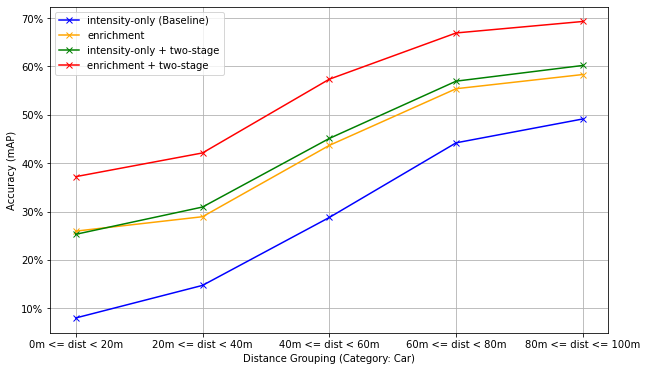

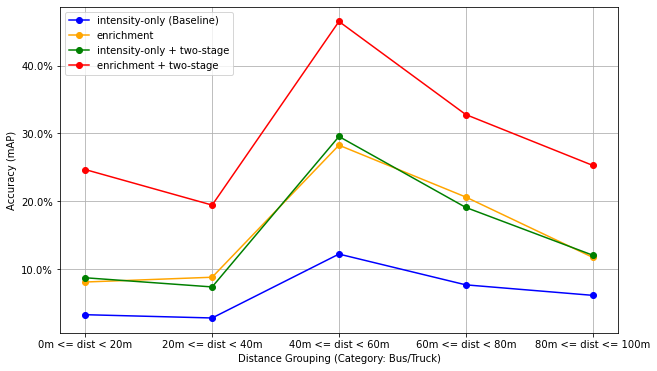

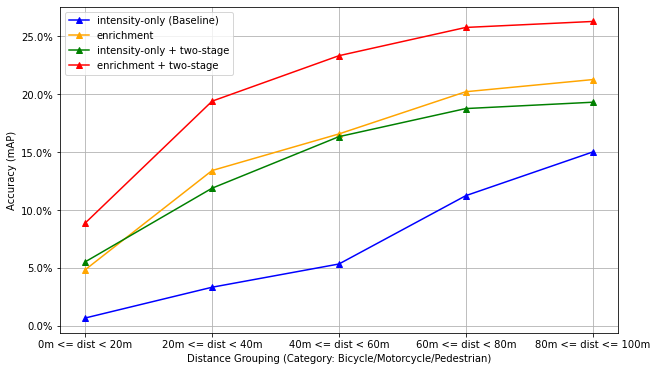

In [16]:
import matplotlib.pyplot as plt

x_tick = ['0m <= dist < 20m',
					'20m <= dist < 40m',
					'40m <= dist < 60m',   
					'60m <= dist < 80m',    
					'80m <= dist <= 100m']

text = ['intensity-only (Baseline)',
				'enrichment',
				'intensity-only + two-stage',
				'enrichment + two-stage']
setting_color = ['blue', 'orange', 'green', 'red']

class_text = ['Car',
							'Bus/Truck',
							'Bicycle/Motorcycle/Pedestrian']
class_marker = ['x', 'o', '^']

tmp = np.array(analytic)

ttmp = tmp.reshape(4, 5, 3, 3)

for j in range(3): # per class
	plt.figure(figsize=(10,6))
	for i in range(ttmp.shape[0]):
		c = setting_color[i]
		cat = ttmp[i][:, j, -1]
		# print(cat)
		plt.plot(x_tick, cat.astype(np.float16)*100, color=c, marker=class_marker[j], label=text[i])

	plt.legend(loc="upper left")
	plt.grid(True)

	plt.xlabel("Distance Grouping (Category: {})".format(class_text[j]))
	plt.ylabel("Accuracy (mAP)")
	# plt.ylim((35, 80))

	import matplotlib.ticker as mtick
	plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

	plt.savefig('/home/950154_customer/sungting/da_centernet_uda/centernet-uda-ang-two-stage-bimo/pgd/exp_imgs/{:02d}.jpg'.format(j), dpi=200, transparent=False)

	# break



In [17]:
analytic

for i in range(4):
	for j in range(5):
		for k in range(3):
			

[['[intensity-only] [0 <= dist < 20]',
  'MSCOCO_Class_car/Precision/AP.50IOU',
  0.07998117804527283],
 ['[intensity-only] [0 <= dist < 20]',
  'MSCOCO_Class_bus_truck/Precision/AP.50IOU',
  0.03282645344734192],
 ['[intensity-only] [0 <= dist < 20]',
  'MSCOCO_Class_ped_bimo/Precision/AP.50IOU',
  0.006823725998401642],
 ['[intensity-only] [20 <= dist < 40]',
  'MSCOCO_Class_car/Precision/AP.50IOU',
  0.14728900790214539],
 ['[intensity-only] [20 <= dist < 40]',
  'MSCOCO_Class_bus_truck/Precision/AP.50IOU',
  0.028010239824652672],
 ['[intensity-only] [20 <= dist < 40]',
  'MSCOCO_Class_ped_bimo/Precision/AP.50IOU',
  0.03334388509392738],
 ['[intensity-only] [40 <= dist < 60]',
  'MSCOCO_Class_car/Precision/AP.50IOU',
  0.2879507541656494],
 ['[intensity-only] [40 <= dist < 60]',
  'MSCOCO_Class_bus_truck/Precision/AP.50IOU',
  0.12221072614192963],
 ['[intensity-only] [40 <= dist < 60]',
  'MSCOCO_Class_ped_bimo/Precision/AP.50IOU',
  0.053419094532728195],
 ['[intensity-only] [60

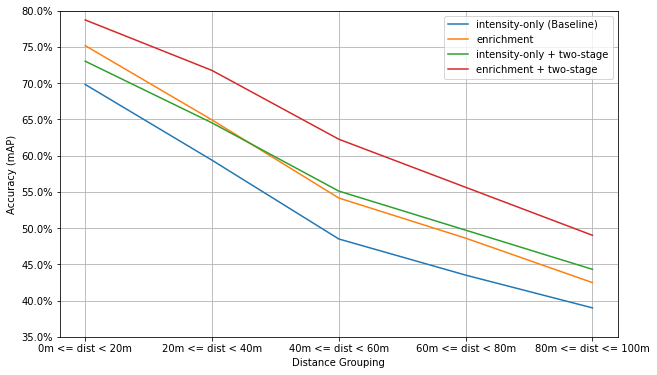

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# x_tick = list(range(5))
x_tick = ['0m <= dist < 20m',
					'20m <= dist < 40m',
					'40m <= dist < 60m',   
					'60m <= dist < 80m',    
					'80m <= dist <= 100m']

text = ['intensity-only (Baseline)',
				'enrichment',
				'intensity-only + two-stage',
				'enrichment + two-stage']

gp

plt.figure(figsize=(10,6))
for i in range(len(gp)):
	plt.plot(x_tick, np.array(gp[i])*100, label=text[i])

plt.legend(loc="upper right")
plt.grid(True)

plt.xlabel("Distance Grouping")
plt.ylabel("Accuracy (mAP)")
plt.ylim((35, 80))

import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.savefig('/home/950154_customer/sungting/code/centernet-uda/pgd/dist_accuracy_img/dist_accuracy.jpg', dpi=199, transparent=False)
plt.show()

[[0.6981776, 0.59363556, 0.48494935, 0.4351085, 0.38989267], [0.75176144, 0.64924467, 0.54146606, 0.4861131, 0.4247674], [0.73024815, 0.6451674, 0.5510233, 0.49713323, 0.4430741], [0.78718007, 0.7174997, 0.62258244, 0.5562578, 0.49004754]]
[[0.0, 0.0, 0.0, 0.0, 0.0], [5.358386039733887, 5.560910701751709, 5.651670694351196, 5.100458860397339, 3.487473726272583], [3.2070577144622803, 5.153185129165649, 6.60739541053772, 6.2024712562561035, 5.318143963813782], [8.900249004364014, 12.386411428451538, 13.76330852508545, 12.114927172660828, 10.015487670898438]]


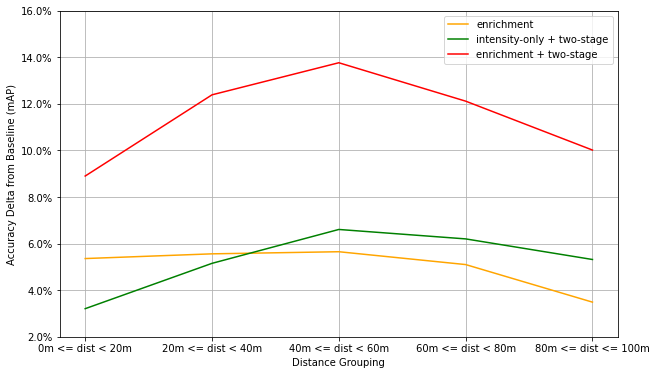

In [59]:
print(gp)
delta_gp = [[(x - gp[0][i])*100  for i, x in enumerate(b)] for b in gp]
print(delta_gp)
clist = ['orange', 'g', 'r']

plt.figure(figsize=(10,6))
for i in range(1, len(delta_gp)):
	plt.plot(x_tick, delta_gp[i], label=text[i], c=clist[i-1])

plt.legend(loc="upper right")
plt.grid(True)

plt.xlabel("Distance Grouping")
plt.ylabel("Accuracy Delta from Baseline (mAP)")
plt.ylim((2, 16))

import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.savefig('/home/950154_customer/sungting/code/centernet-uda/pgd/dist_accuracy_img/dist_accuracy_delta.jpg', dpi=199, transparent=False)
plt.show()

In [ ]:
# tmp backup
from tqdm import tqdm

import operator

## distance test start
logic_list = [
	lambda x: np.logical_and(operator.le(0, x), operator.lt(x, 20)),
	lambda x: np.logical_and(operator.le(20, x), operator.lt(x, 40)),
	lambda x: np.logical_and(operator.le(40, x), operator.lt(x, 60)),
	lambda x: np.logical_and(operator.le(60, x), operator.lt(x, 80)),
	lambda x: np.logical_and(operator.le(80, x), operator.le(x, 100))
]

logic_text = [
	"0 <= dist < 20",
	"20 <= dist < 40",
	"40 <= dist < 60",
	"60 <= dist < 80",
	"80 <= dist < 100"
]
## distance test end


## all exps <
all_exp_root_dir = {
	0: single_class_1feature,
	1: single_class_5feature,
	2: single_class_1feature_two_stage,
	3: single_class_5feature_two_stage
}

all_exp = {
	0: feature1,
	1: feature5,
	2: feature1_two_stage,
	3: feature5_two_stage
}

all_exp_text = {
	0: 'intensity-only',
	1: 'enrichment',
	2: 'intensity-only two-stage',
	3: 'enrichment two-stage'
}
## all exps >


defaults = {
		'score_threshold': 0.1,
		"per_class": True}

num_classes = 1
cats = {1: {'id': 1, 'name': 'vehicle'}}
cat_mapping = {v: i for i,
										v in enumerate(range(1, num_classes + 1))}
classes = {y: cats[x] if x in cats else ''
								for x, y in cat_mapping.items()}

# evaluator = Evaluator(**defaults)
# evaluator.classes = classes
# evaluator.num_workers = 6
# evaluator.use_rotated_boxes = True

all_result = {}

for k, v in all_exp.items():
	for i, exp in enumerate(tqdm(v)):
		exp_arr = np.load(os.path.join(
			all_exp_root_dir[0],
			exp
		))

		exp_arr = dict(exp_arr)

		for ii, dist_logic in enumerate(logic_list):
			evaluator = Evaluator(**defaults)
			evaluator.classes = classes
			evaluator.num_workers = 6
			evaluator.use_rotated_boxes = True

			img_shape = (1142, 1142)
			pixel2m = 0.175

			tmp_exp_arr = {}

			x = exp_arr['pred_boxes'][:, 0]
			y = exp_arr['pred_boxes'][:, 1]
			dist = np.sqrt((x - img_shape[1]//2)**2 + (-y + img_shape[0]//2)**2) * pixel2m
			pred_selection = dist_logic(dist)

			x = exp_arr['gt_boxes'][:, 0]
			y = exp_arr['gt_boxes'][:, 1]
			dist = np.sqrt((x - img_shape[1]//2)**2 + (-y + img_shape[0]//2)**2) * pixel2m
			gt_selection = dist_logic(dist)

			for kk in exp_arr:
				if 'pred' in kk:
					tmp_exp_arr[kk] = exp_arr[kk][pred_selection][None, ...]
				if 'gt' in kk:
					tmp_exp_arr[kk] = exp_arr[kk][gt_selection][None, ...]
			
			print(pred_selection.shape, gt_selection.shape)

			inp = {"pred_boxes": exp_arr['pred_boxes'],
					"pred_classes": exp_arr['pred_classes'],
					"pred_scores": exp_arr['pred_scores'],
					"gt_boxes": exp_arr['gt_boxes'],
					"gt_classes": exp_arr['gt_classes'],
					"gt_ids": [i],
					"gt_areas": None,
					"image_shape": (3, 1152, 1152)}
					
			evaluator.add_batch(**inp)
		
		result = evaluator.evaluate()
		all_result["[{}] [{}]".format(all_exp_text[k], logic_text[ii])] = result

	# break


In [57]:
result = evaluator.evaluate()

In [58]:
result

{'MSCOCO_Class_vehicle/Precision/AP': 0.2292162925004959,
 'MSCOCO_Precision/mAP': 0.22921629,
 'MSCOCO_Class_vehicle/Precision/AP.50IOU': 0.5865321755409241,
 'MSCOCO_Precision/mAP.50IOU': 0.5865322,
 'MSCOCO_Class_vehicle/Precision/AP.75IOU': 0.11925103515386581,
 'MSCOCO_Precision/mAP.75IOU': 0.119251035,
 'MSCOCO_Class_vehicle/Recall/AR1': 0.07716333866119385,
 'MSCOCO_Recall/mAR1': 0.07716334,
 'MSCOCO_Class_vehicle/Recall/AR10': 0.2983579933643341,
 'MSCOCO_Recall/mAR10': 0.298358,
 'MSCOCO_Class_vehicle/Recall/AR100': 0.3559890389442444,
 'MSCOCO_Recall/mAR100': 0.35598904,
 'MSCOCO_Class_vehicle/Precision/mAP_small': 0.2220858335494995,
 'MSCOCO_Precision/mAP_small': 0.22208583,
 'MSCOCO_Class_vehicle/Precision/mAP_medium': 0.258620023727417,
 'MSCOCO_Precision/mAP_medium': 0.25862002,
 'MSCOCO_Class_vehicle/Precision/mAP_large': nan,
 'MSCOCO_Precision/mAP_large': nan,
 'MSCOCO_Class_vehicle/Recall/AR100_small': 0.3555164635181427,
 'MSCOCO_Recall/mAR100_small': 0.35551646,
 '

In [63]:
print(exp1_arr['pred_boxes'].shape)

exp1_arr['gt_boxes'].shape

(1, 150, 5)


(1, 4, 5)

In [74]:
tmp = exp1_arr['gt_boxes'][0]
# def gen_dist_from_bbox(bbox):
# 	x = 

# tmp.shape (4, 5)

img_shape = (1142, 1142)
pixel2m = 0.175

x = tmp[:, 0]
y = tmp[:, 1]

dist = np.sqrt((x - img_shape[1]//2)**2 + (-y + img_shape[0]//2)**2) * pixel2m
print(x, y)
print(dist)

# ((1142//2 - 588.5 )**2 + (1142//2 - 492.)**2) ** 0.5

# def logic_list(x):


[590.  588.5 587.  585.5] [526.  492.  463.  431.5]
[ 8.548172 14.160138 19.106281 24.544022]


In [88]:
import operator

logic_list = [
	lambda x: np.logical_and(operator.le(0, x), operator.lt(x, 20)),
	lambda x: np.logical_and(operator.le(20, x), operator.lt(x, 40)),
	lambda x: np.logical_and(operator.le(40, x), operator.lt(x, 60)),
	lambda x: np.logical_and(operator.le(60, x), operator.lt(x, 80)),
	lambda x: np.logical_and(operator.le(80, x), operator.le(x, 100))
]

logic_text = [
	"0 <= dist < 20",
	"20 <= dist < 40",
	"40 <= dist < 60",
	"60 <= dist < 80",
	"80 <= dist < 100"
]

In [93]:
for i, lf in enumerate(logic_list):
	print(dist)
	print(logic_text[i])
	print(lf(dist))
	selection = lf(dist)
	print(dist[selection])
	print()


[ 8.548172 14.160138 19.106281 24.544022]
0 <= dist < 20
[ True  True  True False]
[ 8.548172 14.160138 19.106281]

[ 8.548172 14.160138 19.106281 24.544022]
20 <= dist < 40
[False False False  True]
[24.544022]

[ 8.548172 14.160138 19.106281 24.544022]
40 <= dist < 60
[False False False False]
[]

[ 8.548172 14.160138 19.106281 24.544022]
60 <= dist < 80
[False False False False]
[]

[ 8.548172 14.160138 19.106281 24.544022]
80 <= dist < 100
[False False False False]
[]



In [98]:
a = np.random.randint(0, 10, (150, ))


In [100]:
t = a > 5
t
a[t]

array([6, 7, 7, 7, 8, 7, 8, 9, 9, 7, 7, 9, 6, 7, 7, 9, 6, 9, 7, 8, 7, 9,
       8, 9, 6, 8, 9, 8, 6, 8, 6, 7, 9, 7, 9, 9, 7, 9, 9, 9, 9, 8, 9, 6,
       6, 9, 7, 8, 6, 8, 6, 7, 8, 9, 7, 6, 7, 8, 8, 9, 7, 6])